In [2]:
### REQUIRED IMPORTS
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

np.random.seed(42)

<h2><center> 1. First Posterior PDF </h2>

### Goals

**1. Understand and implement in code the following components of Bayesian Inference**

    1. Prior Distribution
    2. Sampling Function / Likelihood
    3. Posterior Distribution

**2. Define each component for our toy example: Measuring Phil's Height.**

**3. Visualize the result of assigning a prior, observing/measuring data and updating our belief to the posterior distribution.** 


### Example Scenario
We want to measure Phil's height. Before making any measurements, we think his height is `182 cm +/- 12.7 cm`. We then make three **independent** measurements of his height and record `190`, `185`, and `191`. In this notebook, we want to understand and visualize how we can arrive at a <u>final probability distribution function (PDF)</u> describing Phil's height or the <u>Posterior PDF</u>, using the provided information.

### Bayes Theorem
`In this section outline Bayes Theorem.`

### Prior Assumptions

`Explain what the prior assumptions are.`

In [8]:
### In this cell, implement the prior assumption as a function, 
### We can use this function when we later compute the posterior PDF
def prior_distribution(x):
    # Mean and standard deviation of Phil's height prior belief
    mean_height = 182  # in cm
    std_dev = 12.7  # in cm
    
    # Compute the probability density function (PDF) using the normal distribution formula
    pdf = (1 / (std_dev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean_height) / std_dev) ** 2)
    
    return pdf



### Likelihood

`Outline the functional form for the likelihood. Describe what assumptions we're making about our likelihood. Derive the analytical description for the likelihood given our 3 datapoints.`

In [4]:
### In this cell, implement the likelihood function given our three observations
### We can use this function when we later compute the posterior PDF

def likelihood(measurements, height):
    # Standard deviation of the measurements
    std_dev_measurement = 1.0  # Assuming a standard deviation of 1 cm for simplicity
    
    # Compute the likelihood as the product of probabilities of observing each measurement
    likelihood_value = 1.0
    for measurement in measurements:
        # Compute the probability of observing each measurement using the normal distribution formula
        likelihood_value *= (1 / (std_dev_measurement * np.sqrt(2 * np.pi))) * \
                            np.exp(-0.5 * ((measurement - height) / std_dev_measurement) ** 2)
    
    return likelihood_value

# Given measurements
measurements = [190, 185, 191]

# Test the likelihood function with a hypothetical height value (e.g., 182 cm)
height_hypothesis = 182
likelihood_value = likelihood(measurements, height_hypothesis)
print("Likelihood given height", height_hypothesis, ":", likelihood_value)

Likelihood given height 182 : 2.301733777304209e-35


In [9]:
### Implement a function that returns the likelihood given a variable number of observations
def likelihood(measurements, height):
    # Standard deviation of the measurements
    std_dev_measurement = 1.0  # Assuming a standard deviation of 1 cm for simplicity
    
    # Compute the likelihood as the product of probabilities of observing each measurement
    likelihood_value = 1.0
    for measurement in measurements:
        # Compute the probability of observing each measurement using the normal distribution formula
        likelihood_value *= (1 / (std_dev_measurement * np.sqrt(2 * np.pi))) * \
                            np.exp(-0.5 * ((measurement - height) / std_dev_measurement) ** 2)
    
    return likelihood_value

# Given measurements
measurements = [190, 185, 191]

# Test the likelihood function with a hypothetical height value (e.g., 182 cm)
height_hypothesis = 182
likelihood_value = likelihood(measurements, height_hypothesis)
print("Likelihood given height", height_hypothesis, ":", likelihood_value)

Likelihood given height 182 : 2.301733777304209e-35


### Posterior Distribution

In [10]:
### Implement a function to obtain the Posterior PDF
import numpy as np

def posterior_pdf(measurements, prior_function, likelihood_function, theta_values):
    # Compute the prior distribution for the given theta values
    prior_values = prior_function(theta_values)
    
    # Compute the likelihood for each theta value
    likelihood_values = np.array([likelihood_function(measurements, theta) for theta in theta_values])
    
    # Compute the unnormalized posterior (prior * likelihood)
    unnormalized_posterior = prior_values * likelihood_values
    
    # Normalize the posterior by dividing by the sum of unnormalized posterior
    posterior = unnormalized_posterior / np.sum(unnormalized_posterior)
    
    return posterior

# Example usage:
# Define the range of theta values (Phil's height)
theta_values = np.linspace(140, 220, 1000)

# Given measurements
measurements = [190, 185, 191]


In [3]:
### Overlay the following curves: 1. the Prior PDF, 2. the Likelihood of each datapoint (3 curves), 
### 3. the Posterior PDF

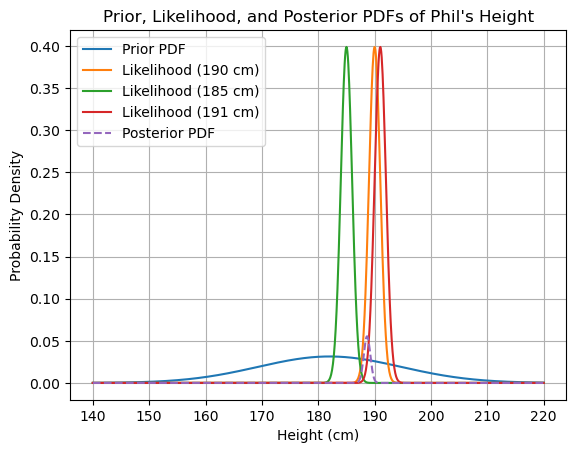

In [6]:
### Overlay the following curves: 1. the Likelihood of each datapoint (3 individual curves), 
### 2. the Likelihood of all datapoints (this is the joint probability of observing all 3 datapoints), 
import numpy as np
import matplotlib.pyplot as plt

# Define prior distribution function
def prior_distribution(x):
    mean_height = 182
    std_dev = 12.7
    pdf = (1 / (std_dev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean_height) / std_dev) ** 2)
    return pdf

# Define likelihood function
def likelihood(measurement, height):
    std_dev_measurement = 1.0
    likelihood_value = (1 / (std_dev_measurement * np.sqrt(2 * np.pi))) * \
                        np.exp(-0.5 * ((measurement - height) / std_dev_measurement) ** 2)
    return likelihood_value

# Define function to compute posterior PDF
def posterior_pdf(measurements, prior_function, likelihood_function, theta_values):
    prior_values = prior_function(theta_values)
    likelihood_values = np.array([[likelihood(measurement, theta) for measurement in measurements] for theta in theta_values])
    unnormalized_posterior = np.prod(likelihood_values, axis=1) * prior_values
    posterior = unnormalized_posterior / np.sum(unnormalized_posterior)
    return posterior

# Given measurements
measurements = [190, 185, 191]

# Define the range of theta values (Phil's height)
theta_values = np.linspace(140, 220, 1000)

# Compute the posterior PDF
posterior = posterior_pdf(measurements, prior_distribution, likelihood, theta_values)

# Visualize the prior distribution
plt.plot(theta_values, prior_distribution(theta_values), label='Prior PDF')

# Visualize the likelihood curves for each data point
for measurement in measurements:
    plt.plot(theta_values, [likelihood(measurement, theta) for theta in theta_values], label=f'Likelihood ({measurement} cm)')

# Visualize the posterior PDF
plt.plot(theta_values, posterior, label='Posterior PDF', linestyle='--')

# Set plot labels and legend
plt.xlabel("Height (cm)")
plt.ylabel("Probability Density")
plt.title("Prior, Likelihood, and Posterior PDFs of Phil's Height")
plt.legend()
plt.grid(True)
plt.show()


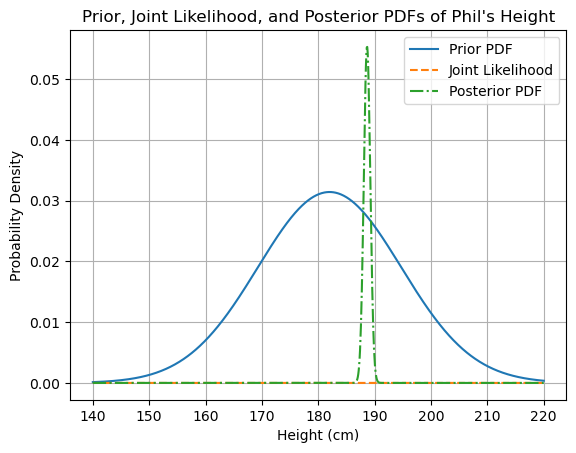

In [7]:
### Overlay the following curves: 1. the Prior PDF, 
### 2. the Likelihood of all datapoints (this is the joint probability of observing all 3 datapoints), 
### 3. the Posterior PDF
import numpy as np
import matplotlib.pyplot as plt

# Define prior distribution function
def prior_distribution(x):
    mean_height = 182
    std_dev = 12.7
    pdf = (1 / (std_dev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean_height) / std_dev) ** 2)
    return pdf

# Define likelihood function
def likelihood(measurements, height):
    std_dev_measurement = 1.0
    likelihood_value = np.prod([(1 / (std_dev_measurement * np.sqrt(2 * np.pi))) * \
                        np.exp(-0.5 * ((measurement - height) / std_dev_measurement) ** 2) for measurement in measurements])
    return likelihood_value

# Define function to compute posterior PDF
def posterior_pdf(measurements, prior_function, likelihood_function, theta_values):
    prior_values = prior_function(theta_values)
    likelihood_values = np.array([likelihood(measurements, theta) for theta in theta_values])
    unnormalized_posterior = likelihood_values * prior_values
    posterior = unnormalized_posterior / np.sum(unnormalized_posterior)
    return posterior

# Given measurements
measurements = [190, 185, 191]

# Define the range of theta values (Phil's height)
theta_values = np.linspace(140, 220, 1000)

# Compute the posterior PDF
posterior = posterior_pdf(measurements, prior_distribution, likelihood, theta_values)

# Visualize the prior distribution
plt.plot(theta_values, prior_distribution(theta_values), label='Prior PDF')

# Compute the joint likelihood (likelihood of all data points)
joint_likelihood = [likelihood(measurements, theta) for theta in theta_values]

# Visualize the joint likelihood
plt.plot(theta_values, joint_likelihood, label='Joint Likelihood', linestyle='--')

# Visualize the posterior PDF
plt.plot(theta_values, posterior, label='Posterior PDF', linestyle='-.')

# Set plot labels and legend
plt.xlabel("Height (cm)")
plt.ylabel("Probability Density")
plt.title("Prior, Joint Likelihood, and Posterior PDFs of Phil's Height")
plt.legend()
plt.grid(True)
plt.show()
